In [124]:
import math
import scipy
from scipy import interpolate
import numpy as np
import matplotlib.pyplot as plt
#import file

In [9]:
s=open("MKVOR.dat")
file=s.read()
s.close()

In [64]:
nfile=len(file)
t=0
for n in range(nfile):
    if (file[n]=='\n'):
        t+=1
print(t)

4001


In [220]:
file

'# E [MeV/fm^3] | P [MeV/fm^3] | n_B [1/fm^3]\n0.000000000000000000e+00 0.000000000000000000e+00 0.000000000000000000e+00\n1.423081349139853532e-33 4.707355060796460752e-40 1.529698853973837140e-36\n1.457235301519210017e-30 4.820331582255575810e-37 1.566411626469209231e-33\n8.403153058535914918e-29 2.779646089849700184e-35 9.032718762830105131e-32\n1.492208948755671057e-27 4.936019540229709630e-34 1.604005505504470253e-30\n1.389727880019388571e-26 4.597026426559045681e-33 1.493846537083826005e-29\n8.604828731940776876e-26 2.846357596006092989e-32 9.249504013138027654e-29\n4.019852584455358557e-25 1.329711292929890090e-31 4.321020646712741588e-28\n1.528021963525806979e-24 5.054484009195227040e-31 1.642501637636577539e-27\n4.961977849534877142e-24 1.641353219595355616e-30 5.333730102263553578e-27\n1.423081349139854191e-23 4.707355060796496409e-30 1.529698853973837829e-26\n3.691106519440432107e-23 1.220966669595463403e-29 3.967644868718253557e-26\n8.811344621507354346e-23 2.91467017831036

In [89]:
nfile=len(file)
E=[]
P=[]
N=[]
n=0
t=0
while (n+1<nfile):
    if (n==0):
        while (file[n]!='\n'):
            n+=1
            t=1
            continue
    n+=1
    i=0
    while(file[n+i]!=' '):
        i+=1
    E.append(float(file[n:n+i]))
    n+=i+1
    i=0
    while(file[n+i]!=' '):
        i+=1
    P.append(float(file[n:n+i]))
    n+=i+1
    i=0
    while(file[n+i]!='\n'):
        i+=1
    N.append(float(file[n:n+i]))
    t+=1
    n+=i
    
    

In [183]:
Pn=interpolate.interp1d(N,P)
Np=interpolate.interp1d(P,N)
En=interpolate.interp1d(N,E)
Ne=interpolate.interp1d(E,N)
Pe=interpolate.interp1d(E,P)
Ep=interpolate.interp1d(P,E)


In [97]:
number=[n for n in range(len(N))]

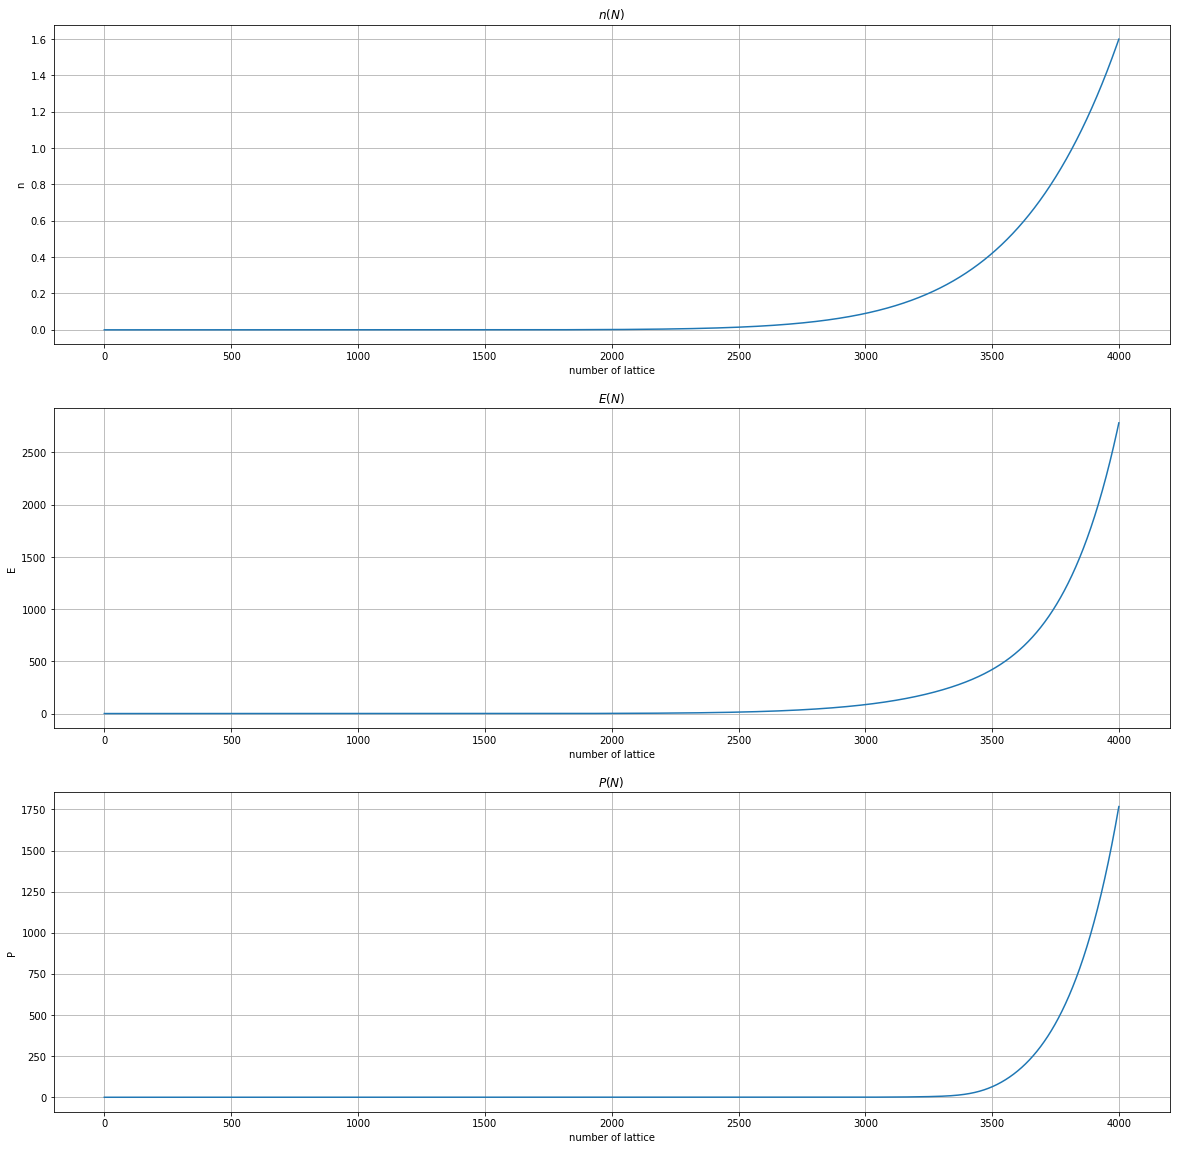

In [432]:
plt.figure(figsize=(20,20))
plt.subplot (3, 1, 1)
plt.plot (number,N)
plt.title ('$n(N)$')
plt.xlabel('number of lattice')
plt.ylabel('n')
plt.grid(1)

plt.subplot (3, 1, 2)
plt.plot (number,E)
plt.title ('$E(N)$')
plt.xlabel('number of lattice')
plt.ylabel('E')
plt.grid(1)
plt.subplot (3, 1, 3)

plt.plot (number,P)
plt.title ('$P(N)$')
plt.xlabel('number of lattice')
plt.ylabel('P')
plt.grid(1)


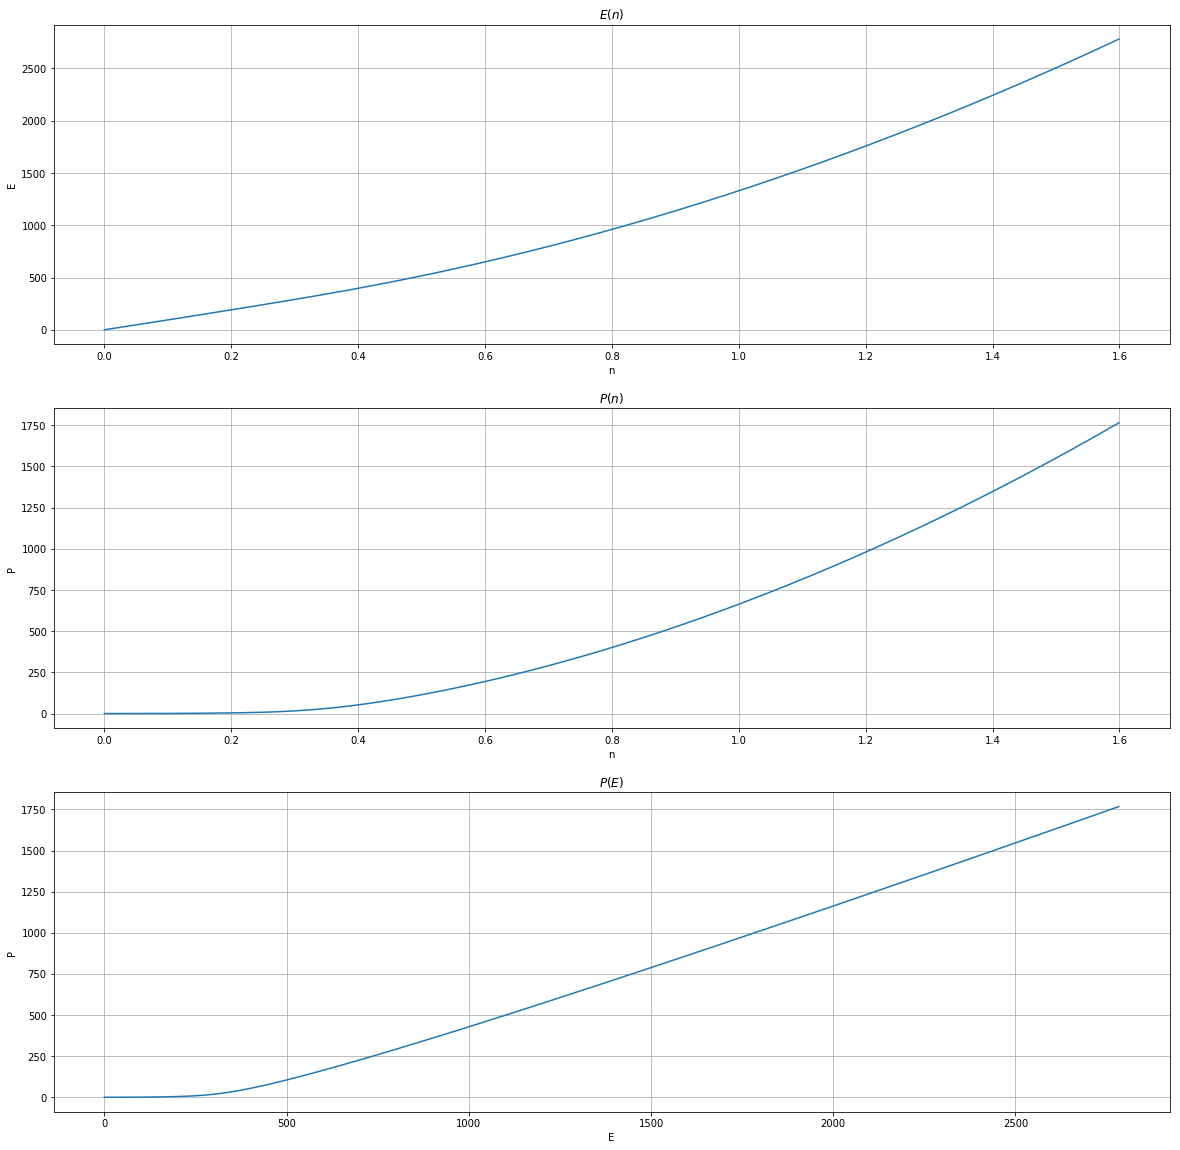

In [433]:
nx=np.arange(0, N[len(N)-1], 10**-3)
Ex=np.arange(0,E[len(E)-1],10**-3)
plt.figure(figsize=(20,20))
plt.subplot (3, 1, 1)
plt.plot(nx,En(nx))
plt.title ('$E(n)$')
plt.xlabel('n')
plt.ylabel('E')
plt.grid(1)

plt.subplot (3, 1, 2)
plt.plot (nx,Pn(nx))
plt.title ('$P(n)$')
plt.xlabel('n')
plt.ylabel('P')
plt.grid(1)
plt.subplot (3, 1, 3)

plt.plot (Ex,Pe(Ex))
plt.title ('$P(E)$')
plt.xlabel('E')
plt.ylabel('P')
plt.grid(1)


We have pole in r=0, so we use r0 as a zero. For example use Max(E) as E(r0)

$\frac{d(M/M_0)}{d(r/km)}\frac{M_0}{km}=4\pi\frac{r^2}{km^2}km^2\frac{P}{\bigg(\frac{MeV}{fm^{3}}\bigg)}\frac{MeV}{fm^{3}}$

$MeV=\frac{1.673}{938.272}\cdot10^{-27}kg=\frac{1.673}{938.272}\cdot10^{-27}\frac{6.67*10^{-14}}{9*10^{16}}km=\frac{1.673\cdot6.67}{938.272\cdot9}10^{-57}km=[mev]10^{-57}km$

$\frac{d(M/M_0)}{d(r/km)}=\frac{4\pi\ (10^3m)^3\ MeV}{M_0\ (10^{-15}m)^{3}}\frac{r^2}{km^2}\frac{P}{\bigg(\frac{MeV}{fm^{3}}\bigg)}=\frac{4\pi[mev]}{[M_0]}10^{-3}\frac{r^2}{km^2}\frac{P}{\bigg(\frac{MeV}{fm^{3}}\bigg)}$

In [409]:
n0=0.16
MSun=1.4766

In [414]:
mev=1.673*6.67/938.272/9*10**-57
const=10**54*mev/MSun

In [415]:
def M0(n):
    return 4*math.pi/3*const*r0**3*En(n)

In [416]:
def dM(n,r):
    return 4*math.pi*const*(r**2*En(n))

In [417]:
def dP(n,m,r):
    return -MSun*(En(n)+Pn(n))*(m+4*math.pi*const*r**3*Pn(n))/r/(r-2*MSun*m)

Define MPR every step

In [441]:
nc=1.59
Pc=Pn(nc)
Ec=En(nc)
r0=10**-3
dr=10**-3
Rr=[r0]
Mr=[M0(nc)+0]
Pr=[1+0]
Er=[1+0]
Nr=[1]
Pcur=Pr[0]+dP(Nr[0]*nc,Mr[0],Rr[0])/Pc+0
t=0
while (Pcur>0)and(abs(Pcur)>10**-6):
    rl=len(Rr)-1
    ml=len(Mr)-1
    pl=len(Pr)-1
    el=len(Er)-1
    #
#    x=np.arange(dr0,10**5*dr0,dr0/10)
#    dr1=x[np.argmax(dP(Nr[nl],Mr[ml],Rr[rl]+x))]
#    if dr1:
#        dr=dr1
#    else:
#        dr=dr0
#    print('dr=%f'%dr)
    #
#    print(rl,ml,pl,el)
    Pcur=Pr[pl]+dP(Nr[nl]*nc,Mr[ml],Rr[rl])*dr/Pc
#    print(dP(Nr[nl],Mr[ml],Rr[rl])*dr)
    Rr.append(Rr[rl]+dr)
    Mr.append(Mr[ml]+dM(Nr[nl]*nc,Rr[rl])*dr+0)
    Er.append(Ep(Pcur*Pc)/Ec+0)
    Nr.append(Np(Pcur*Pc)/nc+0)
    Pr.append(Pcur+0)
#    print('R',Rr[rl+1])
#    print('M',Mr[ml+1])
#    print('E',Er[el+1])
#    print('N',Nr[nl+1])
    if nl%10000==0:
        print('P',Pr[pl+1])
    Pcur=Pr[pl+1]+dP(Nr[nl+1],Mr[ml+1],Rr[rl+1])*dr/Pc
#    t+=1
#    print(t)

P 0.9999998859373196
P 0.9999996971455641
P 0.9999994030318976
P 0.9999989984064201
P 0.999998481586458
P 0.9999978518398785
P 0.9999971087883972
P 0.9999962522130831
P 0.9999952819765888
P 0.9999941979873871
P 0.9999930001815532
P 0.9999916885127296
P 0.9999902629462436
P 0.999988723455483
P 0.9999870700195654
P 0.9999853026217891
P 0.9999834212485688
P 0.9999814258886877
P 0.999979316532759
P 0.9999770931728302
P 0.9999747558020877
P 0.9999723044146323
P 0.9999697390053058
P 0.9999670595695576
P 0.9999642661033367
P 0.9999613586030083
P 0.9999583370652846
P 0.9999552014871698
P 0.9999519518659145
P 0.9999485881989782
P 0.9999451104839985
P 0.9999415187187645
P 0.9999378129011951
P 0.9999339930293206
P 0.9999300591012669
P 0.9999260111152414
P 0.9999218490695223
P 0.999917572962448
P 0.9999131827924085
P 0.9999086785578379
P 0.9999040602572079
P 0.9998993278890219
P 0.9998944814518098
P 0.9998895209441239
P 0.9998844463645344
P 0.9998792577116266
P 0.9998739549839967
P 0.9998685381802

P 0.9832340172238604
P 0.9831716973433531
P 0.9831092602897032
P 0.9830467060512447
P 0.982984034616288
P 0.9829212459731214
P 0.9828583401100099
P 0.982795317015196
P 0.982732176676899
P 0.9826689190833158
P 0.9826055442226199
P 0.9825420520829625
P 0.9824784426524715
P 0.9824147159192522
P 0.9823508718713869
P 0.982286910496935
P 0.9822228317839329
P 0.9821586357203943
P 0.9820943222943099
P 0.9820298914936475
P 0.9819653433063519
P 0.981900677720345
P 0.9818358947235256
P 0.9817709943037699
P 0.981705976448931
P 0.9816408411468388
P 0.9815755883853005
P 0.9815102181521002
P 0.9814447304349989
P 0.981379125221735
P 0.9813134025000233
P 0.9812475622575562
P 0.9811816044820025
P 0.9811155291610085
P 0.981049336282197
P 0.9809830258331682
P 0.9809165978014988
P 0.9808500521747426
P 0.9807833889404307
P 0.9807166080860705
P 0.9806497095991469
P 0.9805826934671211
P 0.9805155596774318
P 0.9804483082174941
P 0.9803809390747003
P 0.9803134522364194
P 0.9802458476899976
P 0.9801781254227574


P 0.943717962237133
P 0.943602000854604
P 0.9434859147201252
P 0.9433697038109092
P 0.9432533681041405
P 0.943136907576976
P 0.9430203222065447
P 0.942903611969948
P 0.9427867768442589
P 0.9426698168065232
P 0.9425527318337583
P 0.942435521902954
P 0.9423181869910722
P 0.9422007270750465
P 0.9420831421317832
P 0.9419654321381601
P 0.9418475970710273
P 0.9417296369072067
P 0.9416115516234924
P 0.9414933411966504
P 0.9413750056034187
P 0.9412565448205071
P 0.9411379588245977
P 0.9410192475923441
P 0.940900411100372
P 0.940781449325279
P 0.9406623622436343
P 0.9405431498319795
P 0.9404238120668276
P 0.9403043489246634
P 0.9401847603819438
P 0.9400650464150972
P 0.9399452070005241
P 0.9398252421145964
P 0.939705151733658
P 0.9395849358340244
P 0.9394645943919827
P 0.939344127383792
P 0.9392235347856829
P 0.9391028165738575
P 0.9389819727244899
P 0.9388610032137256
P 0.9387399080176816
P 0.9386186871124467
P 0.9384973404740812
P 0.9383758680786171
P 0.9382542699020576
P 0.9381325459203779
P

P 0.8696266110571298
P 0.8694448094160082
P 0.8692628677775679
P 0.8690807861026609
P 0.8688985643521004
P 0.8687162024866607
P 0.868533700467077
P 0.8683510582540455
P 0.8681682758082233
P 0.8679853530902287
P 0.8678022900606407
P 0.867619086679999
P 0.8674357429088044
P 0.8672522587075185
P 0.8670686340365635
P 0.8668848688563225
P 0.8667009631271392
P 0.8665169168093179
P 0.8663327298631237
P 0.8661484022487824
P 0.8659639339264802
P 0.8657793248563639
P 0.8655945749985409
P 0.8654096843130789
P 0.8652246527600063
P 0.8650394802993118
P 0.8648541668909445
P 0.8646687124948139
P 0.8644831170707898
P 0.8642973805787024
P 0.864111502978342
P 0.8639254842294594
P 0.8637393242917651
P 0.8635530231249305
P 0.8633665806885866
P 0.8631799969423247
P 0.8629932718456961
P 0.8628064053582122
P 0.8626193974393445
P 0.8624322480485244
P 0.8622449571451433
P 0.8620575246885523
P 0.8618699506380629
P 0.8616822349529459
P 0.8614943775924323
P 0.8613063785157126
P 0.8611182376819373
P 0.860929955050

P 0.6906319945325627
P 0.6903309793932924
P 0.6900297811641046
P 0.6897283997643189
P 0.6894268351131758
P 0.6891250871298376
P 0.6888231557333873
P 0.6885210408428294
P 0.6882187423770895
P 0.687916260255014
P 0.6876135943953703
P 0.6873107447168467
P 0.6870077111380521
P 0.6867044935775162
P 0.6864010919536888
P 0.6860975061849408
P 0.6857937361895631
P 0.6854897818857669
P 0.6851856431916838
P 0.6848813200253655
P 0.6845768123047834
P 0.6842721199478292
P 0.6839672428723144
P 0.68366218099597
P 0.6833569342364471
P 0.683051502511316
P 0.6827458857380667
P 0.6824400838341088
P 0.6821340967167708
P 0.6818279243033007
P 0.6815215665108657
P 0.6812150232565519
P 0.6809082944573644
P 0.6806013800302274
P 0.6802942798919835
P 0.6799869939593943
P 0.67967952214914
P 0.679371864377819
P 0.6790640205619488
P 0.6787559906179645
P 0.67844777446222
P 0.6781393720109871
P 0.6778307831804555
P 0.6775220078867334
P 0.6772130460458465
P 0.6769038975737385
P 0.6765945623862706
P 0.6762850403992217
P

P 0.5341350031967624
P 0.5337414083392601
P 0.5333475842241794
P 0.5329535307240927
P 0.5325592477114379
P 0.5321647350585182
P 0.531769992637502
P 0.5313750203204227
P 0.5309798179791787
P 0.5305843854855329
P 0.5301887227111126
P 0.5297928295274098
P 0.5293967058057802
P 0.5290003514174438
P 0.5286037662334843
P 0.5282069501248489
P 0.5278099029623483
P 0.5274126246166567
P 0.5270151149583111
P 0.5266173738577115
P 0.5262194011851205
P 0.5258211968106634
P 0.525422760604328
P 0.5250240924359642
P 0.5246251921752836
P 0.5242260596918602
P 0.5238266948551292
P 0.5234270975343875
P 0.5230272675987934
P 0.5226272049173659
P 0.5222269093589854
P 0.5218263807923927
P 0.5214256190861896
P 0.5210246241088378
P 0.5206233957286595
P 0.5202219338138369
P 0.5198202382324121
P 0.5194183088522867
P 0.5190161455412219
P 0.5186137481668383
P 0.5182111165966152
P 0.5178082506978914
P 0.517405150337864
P 0.5170018153835889
P 0.5165982457019803
P 0.5161944411598105
P 0.5157904016237099
P 0.515386126960

P 0.13480590986454347
P 0.1341743435369957
P 0.1335423825273761
P 0.13291002650752481
P 0.132277275148834
P 0.13164412812224707
P 0.1310105850982579
P 0.13037664574690994
P 0.12974230973779555
P 0.12910757674005507
P 0.1284724464223761
P 0.12783691845299264
P 0.12720099249968433
P 0.12656466822977555
P 0.1259279453101347
P 0.12529082340717337
P 0.12465330218684544
P 0.12401538131464633
P 0.1233770604556122
P 0.12273833927431906
P 0.122099217434882
P 0.12145969460095435
P 0.12081977043572682
P 0.12017944460192671
P 0.11953871676181704
P 0.11889758657719576
P 0.11825605370939488
P 0.11761411781927963
P 0.11697177856724765
P 0.11632903561322812
P 0.11568588861668093
P 0.11504233723659582
P 0.11439838113149156
P 0.11375401995941507
P 0.11310925337794059
P 0.11246408104416879
P 0.11181850261472598
P 0.1111725177457632
P 0.11052612609295537
P 0.10987932731150044
P 0.10923212105611853
P 0.10858450698105103
P 0.10793648474005979
P 0.10728805398642621
P 0.10663921437295036
P 0.10598996555195016

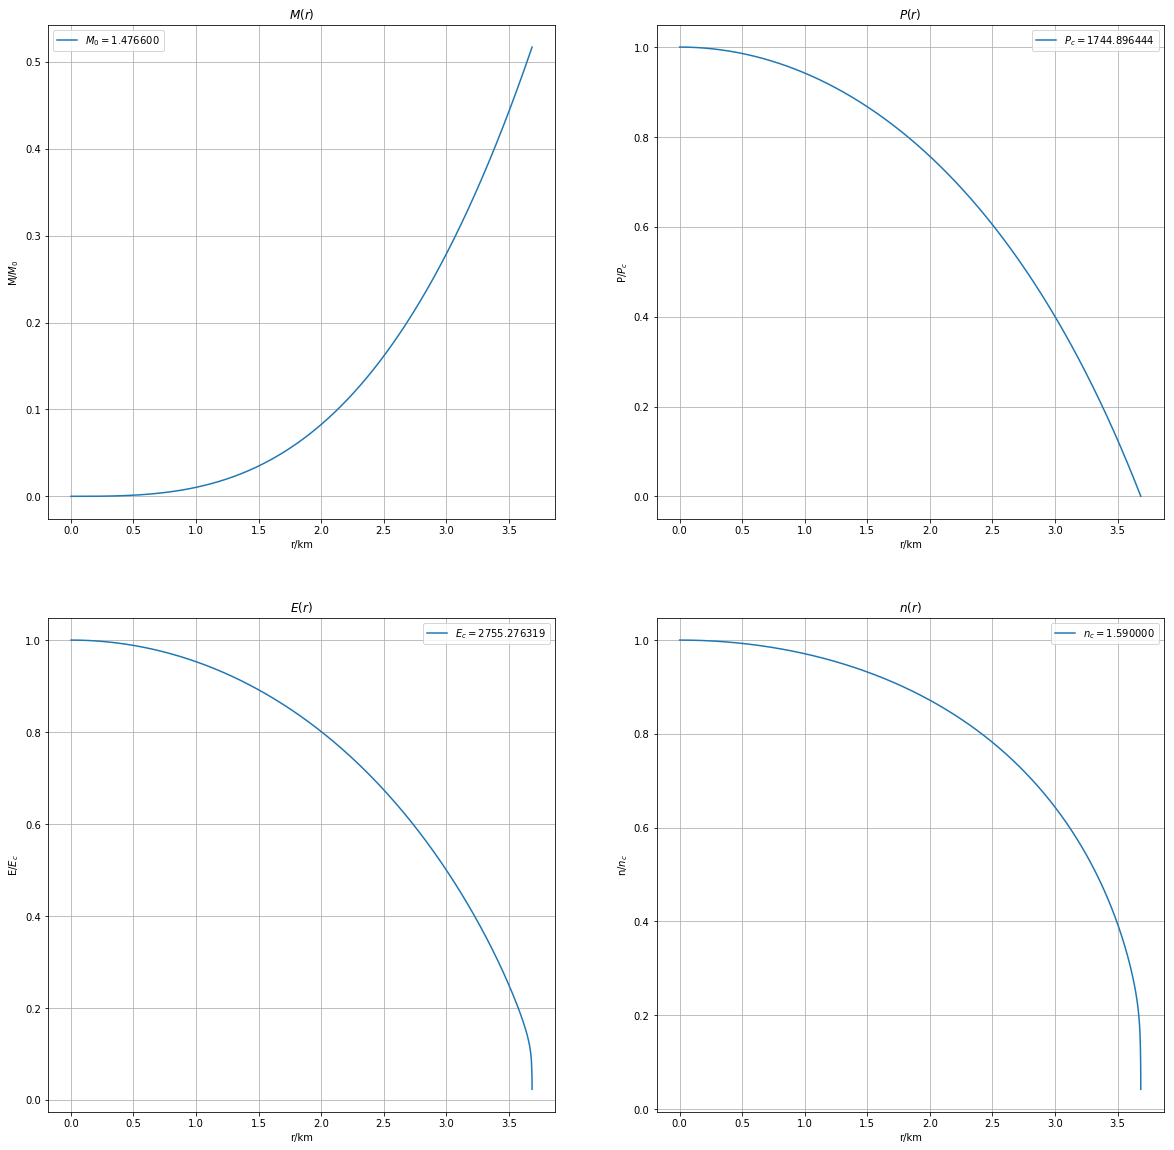

In [454]:
nx=np.arange(0, N[len(N)-1], 10**-3)
Ex=np.arange(0,E[len(E)-1],10**-3)
plt.figure(figsize=(20,20))

plt.subplot (2, 2, 1)
plt.plot(Rr,Mr,label='$M_0=$%f'%MSun)
plt.title ('$M(r)$')
plt.xlabel('r/km')
plt.ylabel('M/$M_0$')
plt.grid(1)
plt.legend()
plt.subplot (2, 2, 2)
plt.plot(Rr,Pr,label='$P_c=$%f'%Pc)
plt.title ('$P(r)$')
plt.xlabel('r/km')
plt.ylabel('P/$P_c$')
plt.grid(1)
plt.legend()
plt.subplot (2, 2, 3)
plt.plot(Rr,Er,label='$E_c=$%f'%Ec)
plt.title ('$E(r)$')
plt.xlabel('r/km')
plt.ylabel('E/$E_c$')
plt.grid(1)
plt.legend()
plt.subplot (2, 2, 4)
plt.plot(Rr,Nr,label='$n_c=$%f'%nc)
plt.title ('$n(r)$')
plt.xlabel('r/km')
plt.ylabel('n/$n_c$')
plt.grid(1)
plt.legend()

In [491]:
Mc=[]
Rc=[]
Nc=[]
for n in range(100):
    nc=1.59-(1.59-0.01)*n/100
    Nc.append(nc)
    Pc=Pn(nc)
    Ec=En(nc)
    r0=10**-3
    dr=10**-3
    Rr=[r0]
    Mr=[M0(nc)+0]
    Pr=[1+0]
    Er=[1+0]
    Nr=[1]
    Pcur=Pr[0]+dP(Nr[0]*nc,Mr[0],Rr[0])/Pc+0
    t=0
    while (Pcur>0):
        rl=len(Rr)-1
        ml=len(Mr)-1
        pl=len(Pr)-1
        el=len(Er)-1
        Rr.append(Rr[rl]+dr)
        Mr.append(Mr[ml]+dM(Nr[nl]*nc,Rr[rl])*dr+0)
        Er.append(Ep(Pcur*Pc)/Ec+0)
        Nr.append(Np(Pcur*Pc)/nc+0)
        Pr.append(Pcur+0)
        Pcur=Pr[pl+1]+dP(Nr[nl+1],Mr[ml+1],Rr[rl+1])*dr/Pc
    Mc.append(Mr[ml+1])
    Rc.append(Rr[rl+1])

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


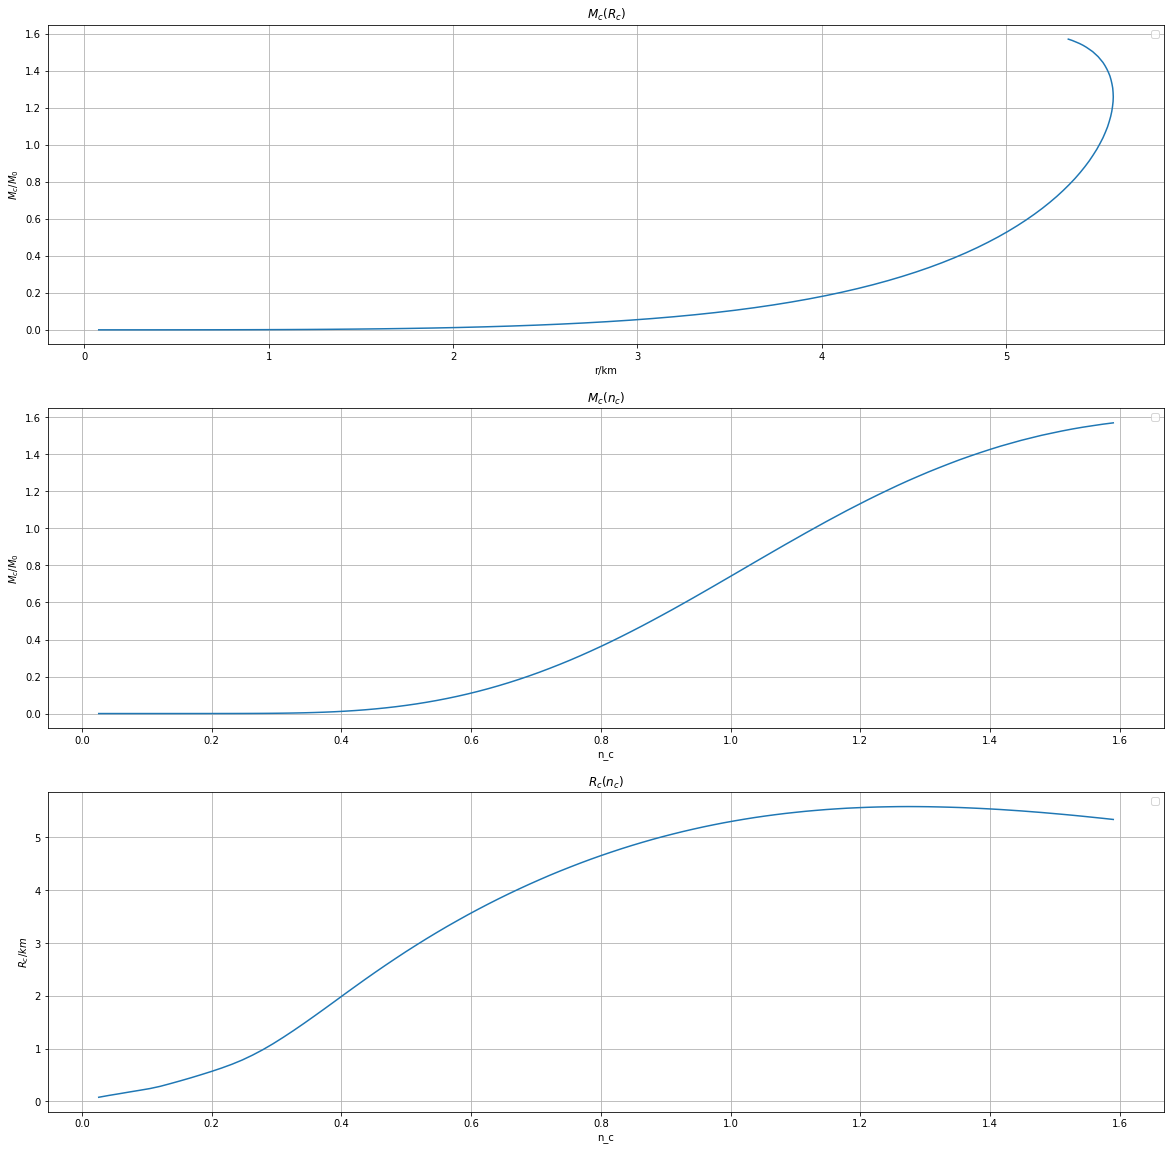

In [495]:
plt.figure(figsize=(20,20))
plt.subplot(3,1,1)
plt.plot(Rc,Mc)
plt.title ('$M_c(R_c)$')
plt.xlabel('r/km')
plt.ylabel('$M_c/M_0$')
plt.grid(1)
plt.legend()
plt.subplot(3,1,2)
plt.plot(Nc,Mc)
plt.title ('$M_c(n_c)$')
plt.xlabel('n_c')
plt.ylabel('$M_c/M_0$')
plt.grid(1)
plt.legend()
plt.subplot(3,1,3)
plt.plot(Nc,Rc)
plt.title ('$R_c(n_c)$')
plt.xlabel('n_c')
plt.ylabel('$R_c/km$')
plt.grid(1)
plt.legend()
